# Phishing Website Detection

- Name : Gaurav Vijay Jadhav
- github : [https://github.com/jadhavgaurav/CodeB_Internship_Project]

# Week 4 Submission

In [25]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
# import dataset

data_url = 'https://raw.githubusercontent.com/jadhavgaurav/CodeB_Internship_Project/refs/heads/main/data/dataset_phishing.csv'

df = pd.read_csv(data_url)

df.sample(frac = 1)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
9990,https://beta.znipe.tv/,22,13,0,2,0,0,0,0,0,...,0,0,0,173,1654,4127669,0,0,3,legitimate
10367,https://www.armeriaegara.com/,29,20,0,2,0,0,0,0,0,...,1,1,0,171,4578,0,0,0,2,legitimate
7134,http://www.techsupportalert.com/content/best-f...,74,24,0,3,4,0,0,0,0,...,1,1,0,79,7226,52982,0,0,5,legitimate
7535,http://www.forlocations.com/savealot,36,20,0,2,0,0,0,0,0,...,1,0,0,14,3639,246250,0,0,3,legitimate
3676,http://www.howdesign.com/editors-picks/10-eye-...,80,17,0,2,6,0,0,0,0,...,1,0,0,218,8915,566894,0,1,5,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,http://houseoftiresbcs.com/Adobe/css/XML/PDF/,45,19,0,1,0,0,0,0,0,...,1,0,0,53,1407,0,0,1,0,phishing
9653,http://www.yilport.n.nu/,24,16,0,3,0,0,0,0,0,...,0,0,0,2692,-1,0,0,0,3,legitimate
1533,http://smsenligne.myfreesites.net/,34,26,0,2,0,0,0,0,0,...,1,0,0,242,1950,341948,0,1,1,phishing
11223,http://www.waymarking.com,25,18,0,2,0,0,0,0,0,...,0,1,0,67,5776,197005,0,0,5,legitimate


# 📊 Data Cleaning Report Phishing Website Detection

##  Dataset Overview

- **Total Records:** 11,430
- **Total Features (excluding target):** 87
- **Target Variable:** `status`  
  - `0`: Legitimate
  - `1`: Phishing

- **Data Types:**
  - **Numerical (int64/float64):** 87
  - **Categorical/Object:** 1 (`url`)

---

###  Target Column

### `status`
- **Description**: Binary label indicating if the website is phishing (`1`) or legitimate (`0`).
- **Relevance**: This is the variable to be predicted by the classification model.

---


In [29]:
# Replace 'Legitimate' with 0 and 'Phishing' with 1 in the 'status' column
df['status'] = df['status'].map({'legitimate':0, 'phishing':1})

print(df['status'].value_counts())


status
0    5715
1    5715
Name: count, dtype: int64


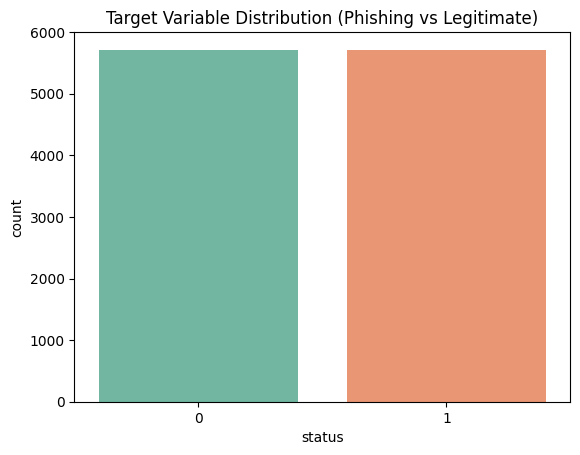

status
0    5715
1    5715
Name: count, dtype: int64


In [30]:
# Basic Info About Target Column and Visualize Target Distribution (Bar Plot)

# Check class distribution

sns.countplot(data=df, x='status', palette='Set2')
plt.title("Target Variable Distribution (Phishing vs Legitimate)")
plt.show()

print(df['status'].value_counts())


In [31]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_ex

In [32]:
# Dropping the 'url' column
# The 'url' column is not useful for training the machine learning model.

df.drop(columns=['url'], inplace=True)

# Feature Selection Report

**Step 1: Correlation Analysis**

Remove features that are highly correlated with each other (e.g., correlation > 0.9 or < -0.9) to reduce multicollinearity.

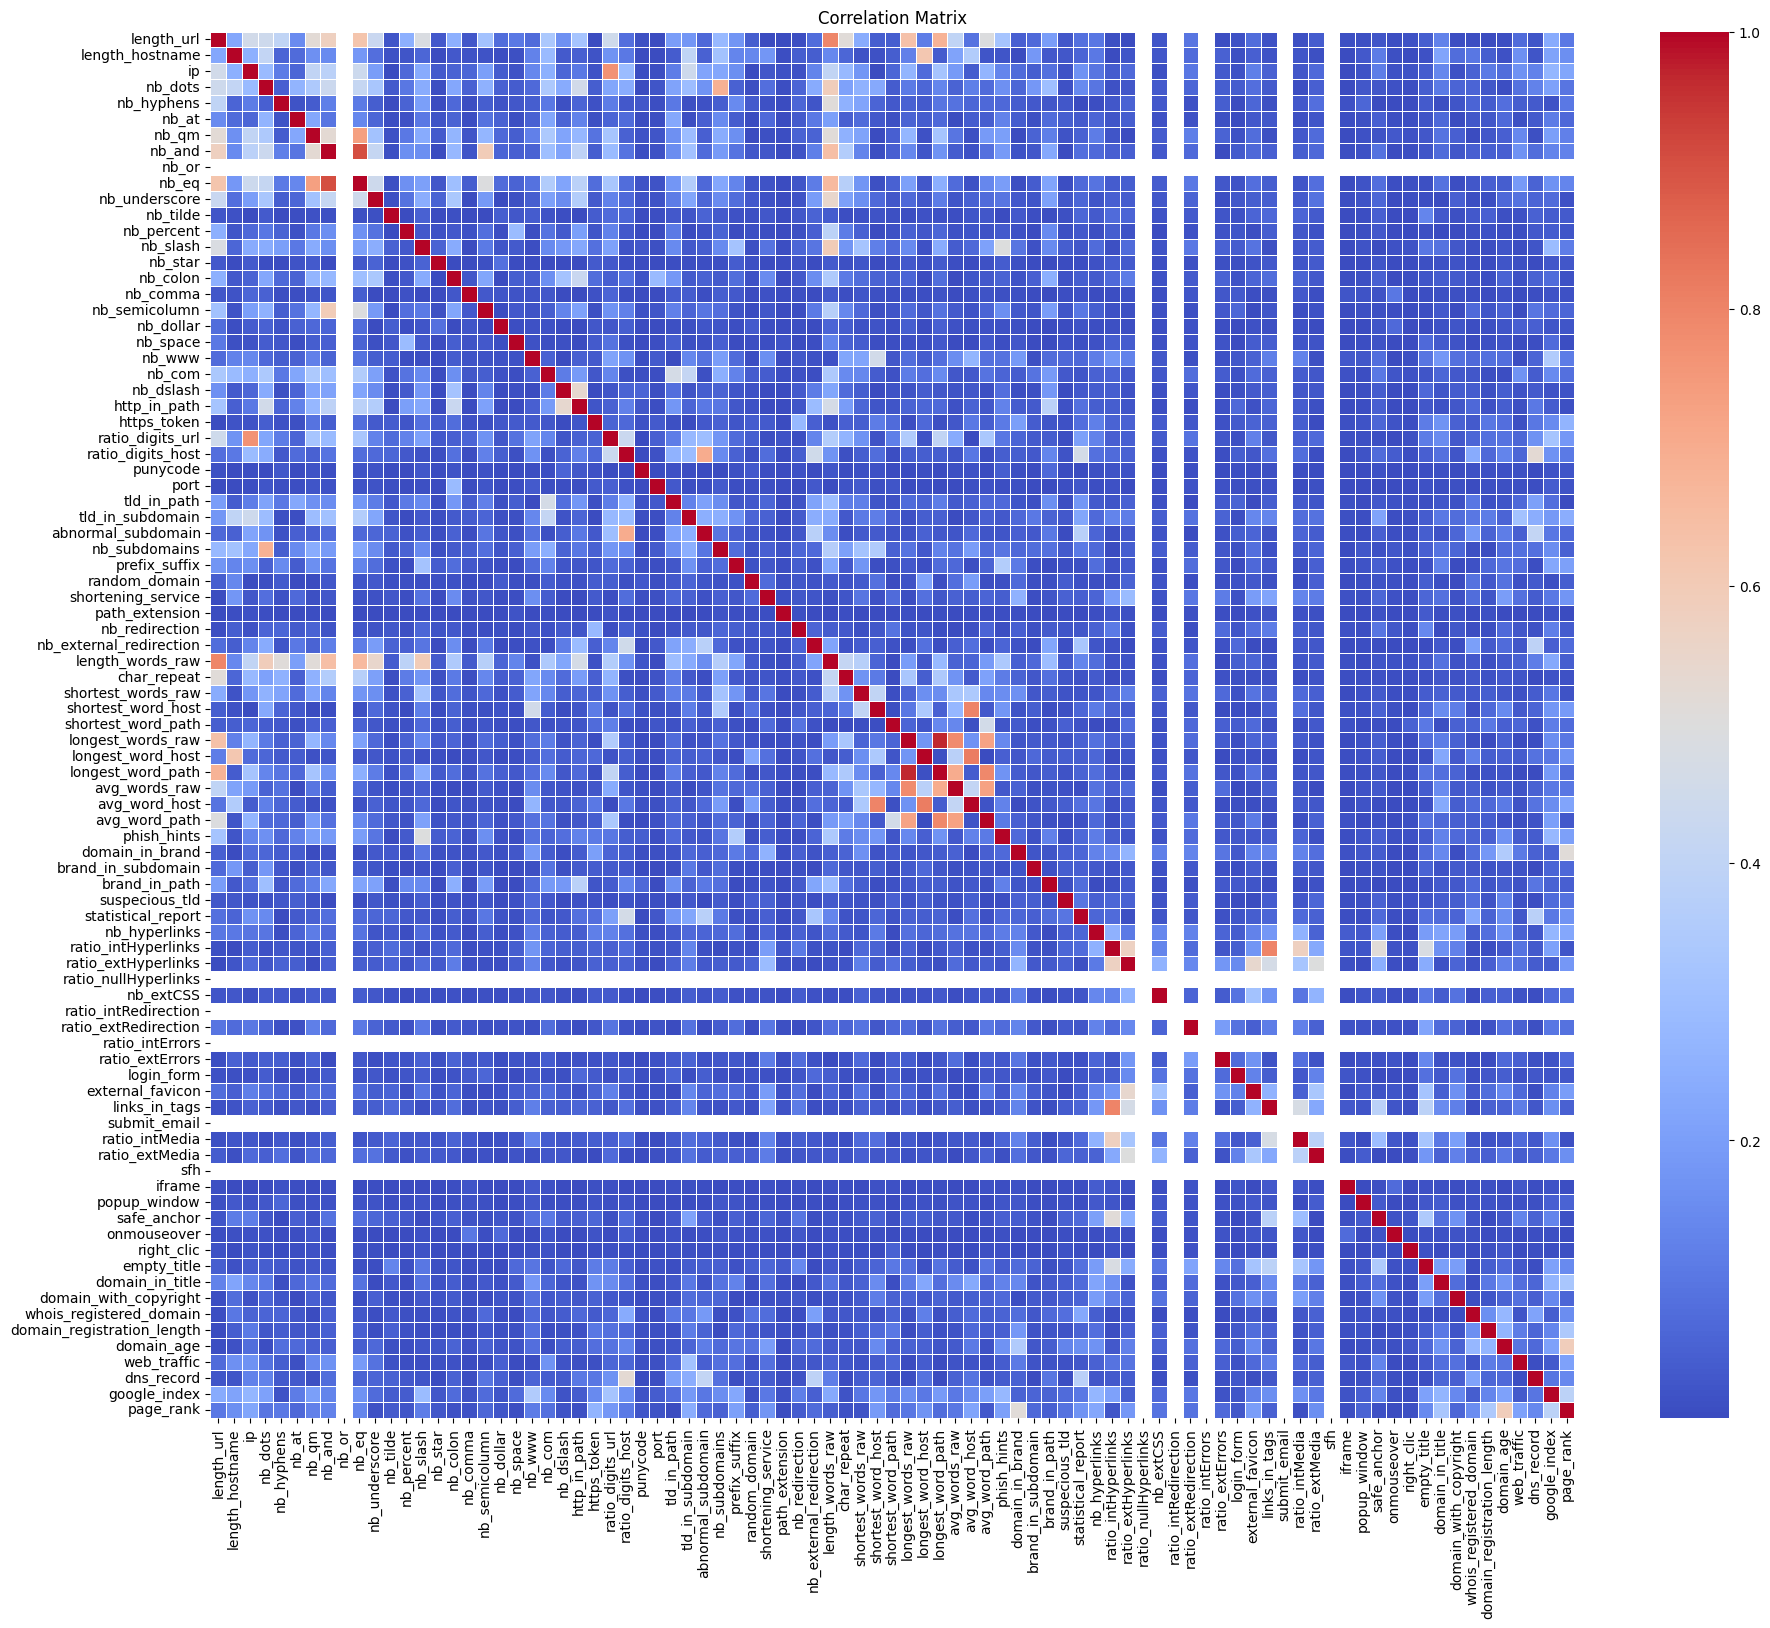

In [33]:
# Step 1: Compute correlation matrix
corr_matrix = df.drop('status', axis=1).corr().abs()  # Exclude target column
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



- The correlation heatmap was generated to visually inspect multicollinearity between features.

- Correlation threshold used: `0.90`

**Heatmap legend:**

`Red diagonal` = perfect correlation (with itself)

`Light blue` = weak or no correlation

`Orange/red`= strong correlation

In [34]:
# Step 2: Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Highly correlated features to drop (corr > 0.9):\n{to_drop}")

# Step 4: Drop the features from the dataset
df_reduced = df.drop(columns=to_drop)
print(f"\nShape before dropping: {df.shape}")
print(f"Shape after dropping: {df_reduced.shape}")

Highly correlated features to drop (corr > 0.9):
['nb_eq', 'longest_word_path']

Shape before dropping: (11430, 88)
Shape after dropping: (11430, 86)


- Computed the correlation matrix (Pearson correlation).

- Identified pairs of features with absolute correlation > 0.90.

- From each such pair, one feature was dropped to reduce redundancy.

**🧹 Dropped Features:**

- Based on correlation > 0.90, the following features were removed:

`'nb_eq'`

`'longest_word_path'`

- These features were highly correlated with other features carrying similar information.

In [35]:
df_reduced.drop(columns=['avg_word_host'], inplace=True)  # Drop avg_word_host column as per VIF analysis

### 2: Feature Selection using ANOVA F-test (f_classif)

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df_reduced.drop(columns=['status'])
y = df_reduced['status']

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=30)  # Select top 20 features
X_kbest = selector.fit_transform(X, y)

# Get selected feature names
selected_features_f_classif = X.columns[selector.get_support()]
print("Top 30 Features selected using f_classif:")
print(selected_features_f_classif)


Top 30 Features selected using f_classif:
Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_and',
       'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'prefix_suffix', 'length_words_raw',
       'shortest_word_host', 'longest_words_raw', 'avg_words_raw',
       'avg_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'links_in_tags', 'ratio_intMedia', 'safe_anchor', 'empty_title',
       'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'google_index',
       'page_rank'],
      dtype='object')


### 3: Random Forest Feature Importance

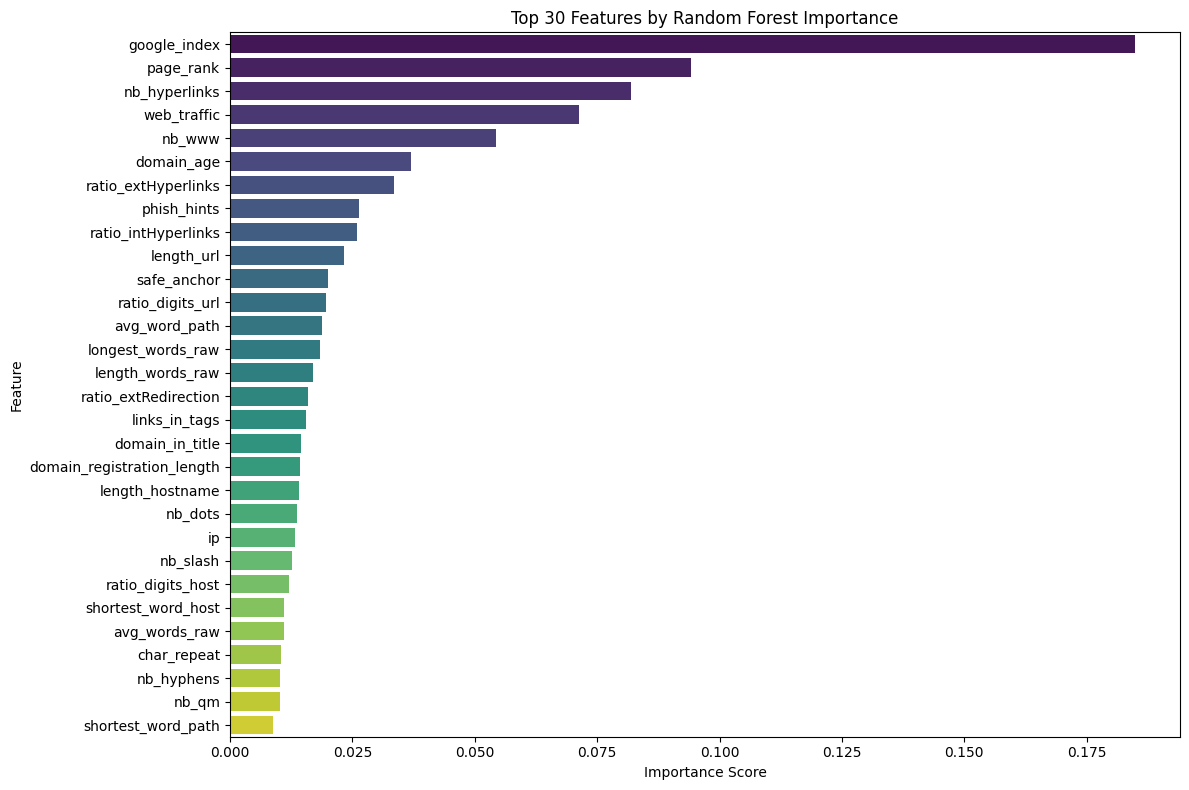

In [37]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming df is already preprocessed and target is separated)
X = df_reduced.drop('status', axis=1)
y = df_reduced['status']

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_30_features = importances.sort_values(ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_30_features.values, y=top_30_features.index, palette='viridis')
plt.title('Top 30 Features by Random Forest Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 4: Apply RFE (Recursive Feature Elimination) 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Use top 40 features for RFE
X_top30 = X[top_30_features.index]

# Apply RFE with Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=42)
rfe = RFE(estimator=lr, n_features_to_select=20)
rfe.fit(X_top30, y)

# Get selected feature names
selected_features_rfe = X_top30.columns[rfe.support_]
print("Top 20 features selected by RFE:\n")
print(selected_features_rfe)

Top 20 features selected by RFE:

Index(['google_index', 'page_rank', 'nb_www', 'ratio_extHyperlinks',
       'phish_hints', 'ratio_intHyperlinks', 'ratio_digits_url',
       'avg_word_path', 'longest_words_raw', 'length_words_raw',
       'ratio_extRedirection', 'domain_in_title', 'nb_dots', 'ip',
       'ratio_digits_host', 'shortest_word_host', 'avg_words_raw',
       'nb_hyphens', 'nb_qm', 'shortest_word_path'],
      dtype='object')


### Final Selected Features from 

`selected_features_rfe` → top 20 features from RFE on top 30 RF features

`selected_features_f_classif` → top 30 features from f_classif

In [39]:
# Convert both to sets
rfe_features_set = set(selected_features_rfe)
f_classif_features_set = set(selected_features_f_classif)

# Take intersection
final_selected_features = list(rfe_features_set.union(f_classif_features_set))

print("Final Selected Features (Intersection of RFE and f_classif):")
print(final_selected_features)
print(f"Number of final selected features: {len(final_selected_features)}")

Final Selected Features (Intersection of RFE and f_classif):
['prefix_suffix', 'nb_hyphens', 'domain_registration_length', 'ratio_digits_host', 'ratio_intHyperlinks', 'avg_word_path', 'ratio_intMedia', 'ip', 'length_hostname', 'length_words_raw', 'nb_www', 'empty_title', 'ratio_extRedirection', 'nb_dots', 'nb_slash', 'tld_in_subdomain', 'nb_hyperlinks', 'google_index', 'nb_and', 'length_url', 'domain_in_title', 'shortest_word_path', 'longest_words_raw', 'ratio_digits_url', 'shortest_word_host', 'links_in_tags', 'safe_anchor', 'page_rank', 'domain_age', 'phish_hints', 'domain_with_copyright', 'avg_words_raw', 'ratio_extHyperlinks', 'nb_qm']
Number of final selected features: 34


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Subset the dataframe to final selected features
X_vif = df_reduced[final_selected_features]

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort VIF descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("VIF for Final Selected Features:")
print(vif_data)


VIF for Final Selected Features:
                       Feature        VIF
9             length_words_raw  26.646784
31               avg_words_raw  22.677655
19                  length_url  21.356093
4          ratio_intHyperlinks  17.695732
14                    nb_slash  16.004551
13                     nb_dots  11.074524
8              length_hostname  10.018208
22           longest_words_raw   8.455121
5                avg_word_path   8.351384
25               links_in_tags   7.433357
20             domain_in_title   5.553849
27                   page_rank   5.356246
24          shortest_word_host   4.893766
23            ratio_digits_url   4.508979
28                  domain_age   4.483027
32         ratio_extHyperlinks   4.213635
7                           ip   3.718532
17                google_index   3.634672
18                      nb_and   2.981160
6               ratio_intMedia   2.974564
1                   nb_hyphens   2.916684
21          shortest_word_path   2.902547
2

In [41]:
features_to_drop_vif = [
    'length_words_raw',
    'avg_words_raw',
    'length_url',
    'ratio_intHyperlinks',
    'nb_slash',
    'nb_dots',
]


In [42]:
# Final Set of Features After VIF Cleaning

final_features_vif = list(set(final_selected_features) - set(features_to_drop_vif))
print(f"Number of final features after VIF cleaning: {len(final_features_vif)}")
print("Final Features After VIF Cleaning:")
final_features_vif

Number of final features after VIF cleaning: 28
Final Features After VIF Cleaning:


['prefix_suffix',
 'nb_hyphens',
 'domain_registration_length',
 'ratio_digits_host',
 'avg_word_path',
 'ratio_intMedia',
 'ip',
 'length_hostname',
 'nb_www',
 'empty_title',
 'ratio_extRedirection',
 'tld_in_subdomain',
 'nb_hyperlinks',
 'google_index',
 'nb_and',
 'domain_in_title',
 'shortest_word_path',
 'longest_words_raw',
 'ratio_digits_url',
 'shortest_word_host',
 'links_in_tags',
 'safe_anchor',
 'page_rank',
 'domain_age',
 'phish_hints',
 'ratio_extHyperlinks',
 'domain_with_copyright',
 'nb_qm']

## Applied Steps for Feature Selection Process:

---

### 1. Correlation Analysis
- Removed highly correlated features (`corr > 0.9`)
- **Dropped:** `'nb_eq'`, `'longest_word_path'`
- **Reduced from 88 to 86 features**

---

### 2. ANOVA (f_classif)
- Selected **top 30 features** based on **univariate F-test**
- Suitable for **numerical features** with **categorical target**

---

### 3. Random Forest Feature Importance
- Trained a **Random Forest Classifier**
- Retrieved **top 30 features** using `feature_importances_`

---

### 4. Recursive Feature Elimination (RFE)
- Applied **RFE** with Random Forest as estimator
- Selected another **top 30 important features**

---

### 5. Feature Union
- Took **intersection** of `f_classif_features_set` & `rfe_features_set`
- Created a **robust final feature set** using two strong methods

---

### 6. Variance Inflation Factor (VIF)
- Evaluated multicollinearity in final selected features

- Dropped 6 features with VIF > 10 to avoid redundancy


# Feature Engineering

In [43]:
# 1. URL Complexity Score
# Combines counts of common “suspicious” tokens into a single indicator.
# Phishing URLs often cram many special characters (www, -, ?, &) to obfuscate their true destination.

df_reduced['url_complexity'] = (
      df_reduced['nb_www'] 
    + df_reduced['nb_hyphens'] 
    + df_reduced['nb_qm'] 
    + df_reduced['nb_and']
)

In [44]:
# 2. Tag‑to‑Link Ratio
# Measures the density of “hidden” tags relative to visible hyperlinks.
# Fake pages load script/link tags disproportionately to real hyperlinks—high ratios indicate suspicious embedding.

df_reduced['tag_to_link_ratio'] = df_reduced['links_in_tags'] / (df_reduced['nb_hyperlinks'] + 1)


In [45]:
# 3. Domain Numeric Intensity
# Scales the digit‑density in the hostname by domain age (older domains with many digits are rarer).
# Young domains with a high digit ratio are more likely auto‐generated by attackers; multiplying by domain_age highlights this risk.

df_reduced['domain_numeric_intensity'] = df_reduced['ratio_digits_host'] * df_reduced['domain_age']

In [46]:
# 4. Path Word Complexity
# Captures both the average word length and the longest word in the URL path.
# Extremely long or complex path segments often appear in phishing payload URLs—this combines average and maximum word length in the path.

df_reduced['path_word_complexity'] = df_reduced['avg_word_path'] * df_reduced['longest_words_raw']

In [47]:
# Drop 5 low-importance/redundant features
features_to_drop = [
    'domain_with_copyright',
    'ratio_intMedia',
    'google_index',
    'page_rank',
    'safe_anchor'
]

# Drop from X_train and X_test
df_reduced = df_reduced.drop(columns=features_to_drop)

# Update the final_features_vif list
final_features_vif = [feature for feature in final_features_vif if feature not in features_to_drop]

# Add the newly engineered features
new_engineered_features = ['url_complexity', 'tag_to_link_ratio', 'domain_numeric_intensity', 'path_word_complexity']
final_features_vif.extend(new_engineered_features)

#  Check final feature count
print("Total final features after update:", len(final_features_vif))
print("Updated Features:\n", final_features_vif)


Total final features after update: 27
Updated Features:
 ['prefix_suffix', 'nb_hyphens', 'domain_registration_length', 'ratio_digits_host', 'avg_word_path', 'ip', 'length_hostname', 'nb_www', 'empty_title', 'ratio_extRedirection', 'tld_in_subdomain', 'nb_hyperlinks', 'nb_and', 'domain_in_title', 'shortest_word_path', 'longest_words_raw', 'ratio_digits_url', 'shortest_word_host', 'links_in_tags', 'domain_age', 'phish_hints', 'ratio_extHyperlinks', 'nb_qm', 'url_complexity', 'tag_to_link_ratio', 'domain_numeric_intensity', 'path_word_complexity']


## 📌 Insights and Recommendations

---

### 🔍 Key Insights from Feature Selection Process

The feature selection pipeline combined statistical rigor and machine learning techniques to ensure an optimal set of predictive variables:

#### ✅ 1. Correlation Analysis
- Identified and removed highly correlated features (`corr > 0.9`) to reduce redundancy.
- **Dropped:** `'nb_eq'`, `'longest_word_path'`
- Reduced feature count from **88 to 86**.

#### ✅ 2. ANOVA F-Test (f_classif)
- Used to select the **top 30 features** based on **univariate analysis**.
- Suitable for identifying strong relationships between **numerical features** and the **categorical target**.

#### ✅ 3. Random Forest Feature Importance
- Leveraged `feature_importances_` from a **trained Random Forest** to extract **top 30 influential features**.

#### ✅ 4. Recursive Feature Elimination (RFE)
- Applied **RFE with Random Forest** as the estimator.
- Selected another **top 30 features**, enhancing robustness.

#### ✅ 5. Feature Intersection (Union Strategy)
- Took the **intersection** of features selected by both **f_classif** and **RFE**.
- Resulted in a **robust and refined feature set** based on two complementary methods.

#### ✅ 6. Variance Inflation Factor (VIF)
- Dropped **6 features** with **VIF > 10** to mitigate multicollinearity issues:
  - `length_words_raw`, `avg_words_raw`, `length_url`, `ratio_intHyperlinks`, `nb_slash`, `nb_dots`

---

### 🧠 Engineered Features That Add High Predictive Value

The following features were engineered to capture phishing-specific patterns:

| Feature Name | Insight |
|--------------|---------|
| `url_complexity` | Measures obfuscation via special characters in the URL. High values are often seen in phishing. |
| `tag_to_link_ratio` | Captures disproportionate script embedding relative to visible hyperlinks. |
| `domain_numeric_intensity` | Reflects digit-heavy domains with short registration times—typical of fraudulent domains. |
| `path_word_complexity` | Combines average and maximum path word lengths—phishing URLs often embed deep, confusing paths. |

---

### 📉 Dropped Redundant / Low-Predictive Features (Post-VIF)

The following features were removed to reduce redundancy or due to weak contribution:

- `domain_with_copyright`
- `ratio_intMedia`
- `google_index`
- `page_rank`
- `safe_anchor`
- *(+6 VIF drops)*: `length_words_raw`, `avg_words_raw`, `length_url`, `ratio_intHyperlinks`, `nb_slash`, `nb_dots`

---

### ✅ Final Recommendations

- ✅ Continue including engineered features in future model pipelines for domain-specific performance gains.
- 🔄 Reapply VIF and correlation checks for each new dataset to ensure stability.
- 📊 Leverage tree-based models like **XGBoost** or **Random Forest** for feature importance validation.
- 📉 Normalize highly skewed features using **PowerTransformer** with `method='yeo-johnson'` to maintain model interpretability and performance.
- 🧪 Consider permutation importance and SHAP values for model explainability.



## Split Dataset into Train and Test set 

In [48]:
from sklearn.model_selection import train_test_split

# Define final feature set and target
X_final = df_reduced[final_features_vif]
y_final = df_reduced['status']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_final  # maintain class distribution
)

# Generate report
train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = len(y_final)

train_percent = round((train_size / total_size) * 100, 2)
test_percent = round((test_size / total_size) * 100, 2)

print("🔍 Data Splitting Report:")
print(f"➡️ Total records: {total_size}")
print(f"✅ Training set: {train_size} records ({train_percent}%)")
print(f"🧪 Testing set: {test_size} records ({test_percent}%)")

print("\n📊 Target Distribution Check:")
print("Train set distribution:")
print(y_train.value_counts(normalize=True).map(lambda x: f"{x:.2%}"))

print("\nTest set distribution:")
print(y_test.value_counts(normalize=True).map(lambda x: f"{x:.2%}"))


🔍 Data Splitting Report:
➡️ Total records: 11430
✅ Training set: 9144 records (80.0%)
🧪 Testing set: 2286 records (20.0%)

📊 Target Distribution Check:
Train set distribution:
status
0    50.00%
1    50.00%
Name: proportion, dtype: object

Test set distribution:
status
1    50.00%
0    50.00%
Name: proportion, dtype: object


In [49]:
print("\nSkewness of Features:")
X_train.skew()


Skewness of Features:


prefix_suffix                  1.483091
nb_hyphens                     4.034987
domain_registration_length    10.801880
ratio_digits_host              5.615369
avg_word_path                 12.714639
ip                             1.972296
length_hostname                4.522406
nb_www                         0.264874
empty_title                    2.265138
ratio_extRedirection           2.232868
tld_in_subdomain               4.147150
nb_hyperlinks                  7.816814
nb_and                        10.090766
domain_in_title               -1.328934
shortest_word_path             4.649295
longest_words_raw             14.463195
ratio_digits_url               2.205006
shortest_word_host             2.296740
links_in_tags                 -0.148617
domain_age                     0.168107
phish_hints                    3.249916
ratio_extHyperlinks            1.018971
nb_qm                          2.480994
url_complexity                 4.126829
tag_to_link_ratio              5.024884


### Handle Skewness

## Skewness Handling Report

### 🔧 Technique Applied
- **Transformer:** Yeo–Johnson PowerTransformer  
- **Library:** `sklearn.preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)`  
- **Reason:** Handles both positive and negative values and reduces skewness without removing outliers.

---

In [50]:
from sklearn.preprocessing import PowerTransformer

# Initialize the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Fit the transformer on the training data and transform the training data
X_train_transformed = pt.fit_transform(X_train)

# Use the fitted transformer to transform the test data
X_test_transformed = pt.transform(X_test)

# Optional: Check skewness on transformed data
print("Skewness after Yeo-Johnson transform (Train):\n", pd.DataFrame(X_train_transformed, columns=X_train.columns).skew().sort_values(ascending=False))
print("Skewness after Yeo-Johnson transform (Test):\n", pd.DataFrame(X_test_transformed, columns=X_test.columns).skew().sort_values(ascending=False))


Skewness after Yeo-Johnson transform (Train):
 tld_in_subdomain              4.147150
nb_and                        3.512775
empty_title                   2.265138
ratio_digits_host             2.199596
nb_qm                         2.130345
ip                            1.972296
phish_hints                   1.701765
prefix_suffix                 1.483091
ratio_digits_url              0.720100
domain_numeric_intensity      0.656725
ratio_extRedirection          0.650762
nb_hyphens                    0.563168
tag_to_link_ratio             0.364356
ratio_extHyperlinks           0.319543
nb_www                        0.219986
url_complexity                0.070897
shortest_word_host            0.018237
shortest_word_path            0.005782
avg_word_path                -0.013200
path_word_complexity         -0.015818
length_hostname              -0.031823
nb_hyperlinks                -0.040903
domain_registration_length   -0.071173
longest_words_raw            -0.097140
links_in_tags    

- After Yeo–Johnson transformation, **most features’ skewness** is reduced **close to zero**, indicating more symmetric distributions.
- This makes subsequent **scaling** ( `RobustScaler`) and **model training** more stable and effective.

## Scaling : RobustScaler()

In [51]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)


# Normalization/Scaling Report

## Techniques Used:

- **Scaling Method Applied:** **RobustScaler**

- **Reason for Selection:**
    - **RobustScaler** was chosen because it is robust to outliers. Unlike **StandardScaler** or **MinMaxScaler**, it scales features using **median** and **IQR (Interquartile Range)**, making it suitable for datasets with outliers, which is common in real-world data.
    - It helps ensure that features are on a similar scale, which is important for machine learning models like **SVM**, **Logistic Regression**, and **KNN**, which are sensitive to the scale of data.

---

## Description of RobustScaler:

- **Scaler Formula:**

$$
\text{scaled} = \frac{X - \text{median}(X)}{\text{IQR}(X)}
$$

    - **Median:** The middle value, less affected by outliers.
    - **IQR:** The difference between the 75th and 25th percentiles, representing the range within which the central 50% of data points lie.

- **Impact of RobustScaler:**
    - **Prevents Outlier Influence:** The scaling technique is **not influenced by extreme values**.
    - **Preserves Distribution:** Data is centered and scaled based on the distribution within the interquartile range, making it **robust to skewed distributions**.

---


In [52]:
# Calculate original distribution (min, max)
original_stats = X_train.agg(['min', 'max']).T
original_stats.columns = ['Original Min', 'Original Max']


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Calculate scaled distribution (min, max)
scaled_stats = X_train_scaled_df.agg(['min', 'max']).T
scaled_stats.columns = ['Scaled Min', 'Scaled Max']

# Combine both into a single table for comparison
comparison_df = pd.concat([original_stats, scaled_stats], axis=1)

# Print results
print("Before-and-After Feature Scaling (RobustScaler):\n")
print(comparison_df.round(3))


Before-and-After Feature Scaling (RobustScaler):

                            Original Min  Original Max  Scaled Min  Scaled Max
prefix_suffix                        0.0         1.000      -0.000       0.145
nb_hyphens                           0.0        32.000      -0.000       1.563
domain_registration_length          -1.0     29829.000      -2.223       5.435
ratio_digits_host                    0.0         0.800      -0.000       0.024
avg_word_path                        0.0       206.000      -0.840       2.999
ip                                   0.0         1.000      -0.000       0.104
length_hostname                      4.0       214.000      -3.638       4.130
nb_www                               0.0         2.000      -0.000       1.342
empty_title                          0.0         1.000      -0.000       0.087
ratio_extRedirection                 0.0         2.000      -0.000       1.465
tld_in_subdomain                     0.0         1.000      -0.000       0.034
nb

## Before-and-After Comparison of Numerical Feature Distributions:

### Before Scaling:
- Features can have **different ranges** (e.g., one feature ranges from 0 to 10, while another ranges from 100 to 1000).
- Outliers could heavily influence the distributions (e.g., extremely large values may shift the mean).

### After Scaling (RobustScaler):
- Features are scaled within a similar range but **without the influence of outliers**.
- The **central tendency** (median) and **spread** (IQR) are preserved and adjusted for each feature, so all features are on a comparable scale for model training.

> 📝 All feature values are now on a similar scale centered around 0, making the model training more stable and faster.


In [53]:
# Final split dataset ready for model training
X_train_scaled
X_test_scaled

array([[ 0.1450004 ,  1.        , -1.97451712, ..., -0.50692832,
        -0.        ,  0.14603119],
       [ 0.1450004 ,  1.        , -0.17208061, ...,  0.349175  ,
        -0.        ,  0.59878878],
       [ 0.1450004 ,  1.        , -0.03154315, ..., -0.50692832,
        -0.        , -0.02040373],
       ...,
       [-0.        , -0.        ,  2.09673827, ..., -0.20355885,
        -0.        , -0.85079951],
       [-0.        ,  1.50903381,  0.09939827, ...,  0.35561974,
        -0.        , -0.00963592],
       [ 0.1450004 ,  1.        , -1.97451712, ..., -0.42727707,
        -0.        , -0.85079951]], shape=(2286, 27))